In-class exercise 8.1
UW AMATH 301 - Jakob Kotas

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

(0.0, 2.0, -5.0, 5.0)

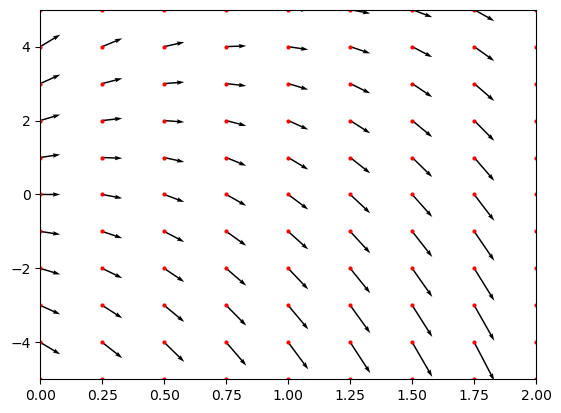

In [323]:
#1
def f(t,y): #y' = f(t,y)
    return y-5*t

#(a)
dt = 0.25
#dt = 0.05
tvec = np.arange(0,2.01,dt)
yvec = np.arange(-5,5.01,1)

#MAKE QUIVER PLOT----------------------------------------
Tmat,Ymat = np.meshgrid(tvec,yvec) #converts vectors to matrices. necessary for quiver plot
U = np.ones([len(yvec),len(tvec)])
V = f(Tmat,Ymat)*(tvec[-1]-tvec[0])/(yvec[-1]-yvec[0])*3/4 #factor needed to scale arrows with axes correctly
plt.quiver(tvec,yvec, U, V, width=0.003)
plt.plot(Tmat,Ymat,'ro',markersize=2) #plot red dots

#(b)
#SOLVE NUMERICALLY WITH EULER'S METHOD--------------------
yold = 3 #initial condition
eulervec = np.array(yold)
for t in tvec[1:len(tvec)]:
    ynew = yold+dt*f(t,yold) #euler's method
    eulervec = np.append(eulervec,ynew)
    yold = ynew
#plt.plot(tvec,eulervec,'-bo',markersize=5)

#(c)
#PLOT ANALYTICAL SOLUTION---------------------------------
tt = np.arange(0,2.00001,dt/100) #more points for a smooth plot
yy = -2*np.exp(tt)+5*tt+5
#plt.plot(tt,yy,'-g')

#PLOT SETTINGS--------------------------------------------
plt.axis(np.array([tvec[0],tvec[-1],yvec[0],yvec[-1]]))

(0.0, 20.0, -2.0, 2.0)

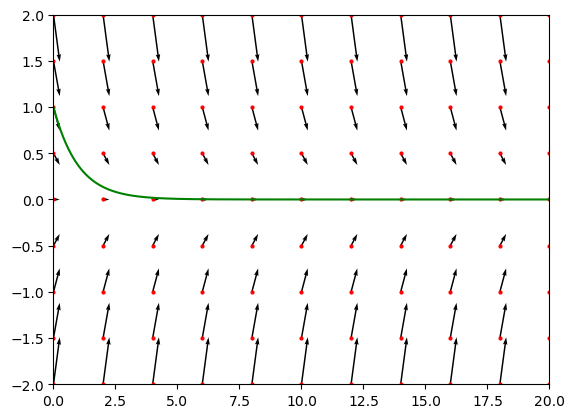

In [39]:
#2
def f(t,y): #y' = f(t,y)
    return -y

#(a)
dt = 2
#dt = 4
#dt = 0.5
tvec = np.arange(0,20.1,dt)
yvec = np.arange(-2,2.1,0.5)

#MAKE QUIVER PLOT----------------------------------------
Tmat,Ymat = np.meshgrid(tvec,yvec) #converts vectors to matrices. necessary for quiver plot
U = np.ones([len(yvec),len(tvec)])
V = f(Tmat,Ymat)*(tvec[-1]-tvec[0])/(yvec[-1]-yvec[0])*3/4 #factor needed to scale arrows with axes correctly
plt.quiver(tvec,yvec, U, V, width=0.003)
plt.plot(Tmat,Ymat,'ro',markersize=2) #plot red dots

#SOLVE NUMERICALLY WITH EULER'S METHOD--------------------
yold = 1 #initial condition
eulervec = np.array(yold)
for t in tvec[1:len(tvec)]:
    ynew = yold+dt*f(t,yold) #euler's method
    eulervec = np.append(eulervec,ynew)
    yold = ynew
#plt.plot(tvec,eulervec,'-bo',markersize=5)

#(b)
#SOLVE NUMERICALLY WITH BACKWARD EULER'S METHOD-----------
yold = 1 #initial condition
backeulvec = np.array(yold)
for t in tvec[1:len(tvec)]:
    ynew = yold/(1+dt) #euler's method
    backeulvec = np.append(backeulvec,ynew)
    yold = ynew
#plt.plot(tvec,backeulvec,'-mo',markersize=5)

#PLOT ANALYTICAL SOLUTION---------------------------------
xx = np.arange(0,20.00001,dt/100)
yy = np.exp(-xx)
plt.plot(xx,yy,'-g')

#PLOT SETTINGS--------------------------------------------
plt.axis(np.array([tvec[0],tvec[-1],yvec[0],yvec[-1]]))

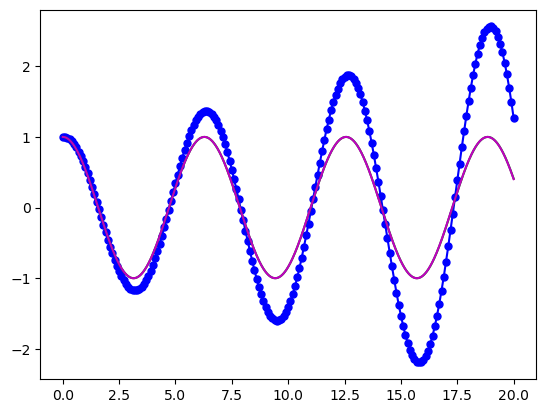

In [133]:
#3
def f(t,v): #v' = f(t,v) where v=[y,z]^T
    output = np.array([v[1],-v[0]])
    return output

#(a)
dt = 0.1
tvec = np.arange(0,20.1,dt)
yvec = np.arange(-2,2.1,0.5)

#SOLVE NUMERICALLY WITH EULER'S METHOD--------------------
yold = np.array([1,0]) #initial condition
eulermat = yold
for t in tvec[1:len(tvec)]:
    ynew = yold+dt*f(t,yold) #euler's method
    eulermat = np.vstack((eulermat,ynew))
    yold = ynew
plt.plot(tvec,eulermat[:,0],'-bo',markersize=5) #y(t)
#plt.plot(tvec,eulermat[:,1],'-ro',markersize=5) #y'(t)

#PLOT ANALYTICAL SOLUTION---------------------------------
tt = np.arange(0,20.00001,dt/100)
yy = np.cos(tt)
plt.plot(tt,yy,'-g')

#SOLVE NUMERICALLY WITH SOLVE_IVP-------------------------
tspan = np.array([0,20]) #starting and ending time
ic = np.array([1,0])
sol = solve_ivp(f,tspan,ic,method="RK45",t_eval=tt)
ysolve = sol.y[0]
plt.plot(tt,ysolve,'-m') #y(t)


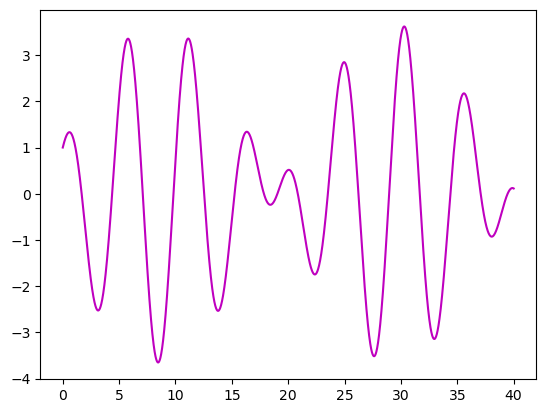

In [169]:
#3
alpha = 1.3
#alpha = 1.1
#alpha = 1.01

def f(t,y): #y' = f(t,y)
    output = np.array([y[1]+np.cos(alpha*t),-y[0]])
    return output

#SOLVE NUMERICALLY WITH SOLVE_IVP-------------------------
tspan = np.array([0,40]) #starting and ending time
ic = np.array([1,0])
tt = np.arange(0,40.00001,0.01)
sol = solve_ivp(f,tspan,ic,method="RK45",t_eval=tt)
ysolve = sol.y[0]
plt.plot(tt,ysolve,'-m') #y(t)
